### Importing Necessary Libraries

In [9]:
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("C:/Users/Aks17/Downloads/blinkit_data.csv")                  

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.size

102276

In [15]:
print ("Size Of Data: ", df.shape)

Size Of Data:  (8523, 12)


In [17]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [6]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [8]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [11]:
df.tail(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


### Data Cleaning

In [15]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [29]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat','low fat':'Low Fat','reg': 'Regular'})

In [19]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


### ** Business Requirements **

### KPI's

In [21]:
#Total Sales
total_sales = df['Sales'].sum()

#Average Sales
avg_sales = df['Sales'].mean()

#No Of Item Sold
no_of_item_sold = df['Sales'].count()

#Average Ratings
avg_ratings = df['Rating'].mean()

#Display
print(f"Total Sales : ${total_sales :,.0f}")
print(f"Average Sales : ${avg_sales :,.0f}")
print(f"No Of Item Sold : {no_of_item_sold :,.0f}")
print(f"Average Ratings : {avg_ratings :,.1f}")


Total Sales : $1,201,681
Average Sales : $141
No Of Item Sold : 8,523
Average Ratings : 4.0


### Charts

### 1. Total Sales by Fat Content


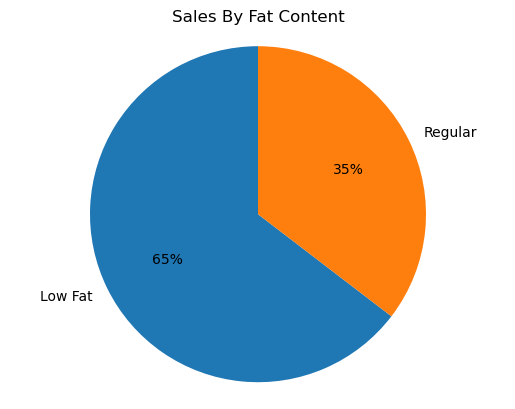

In [23]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels= sales_by_fat.index,autopct ='%.0f%%',startangle = 90)
plt.title('Sales By Fat Content')
plt.axis('equal')
plt.show()
#sales_by_fat.index

##### 
      # This pie chart visualizes total sales distribution based on item fat content.
      # 'Low Fat' items contribute to 65% of the total sales, while 'Regular' items make up 35%.
      # The data was grouped by 'Item Fat Content' and aggregated using the sum of 'Sales'.
      # The chart helps identify which type of fat content drives more sales in the dataset.


### 2. Total Sales by Item Type


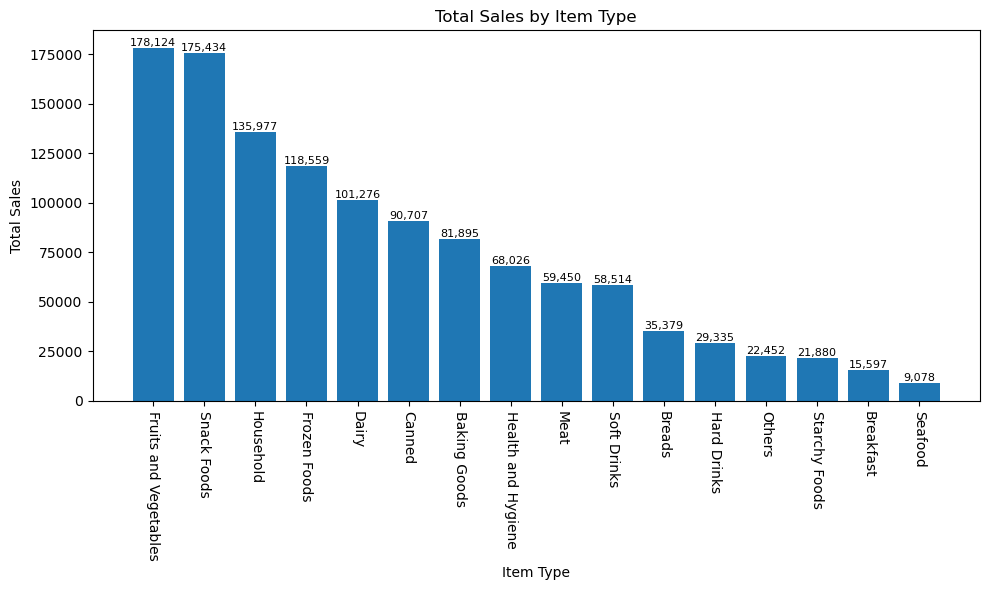

In [25]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,bar.get_height(),
             f'{bar.get_height():,.0f}',  
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


##### 
      # This bar chart shows total sales categorized by different item types.
      # 'Fruits and Vegetables' and 'Snack Foods' are the top-selling categories.
      # 'Seafood', 'Breakfast', and 'Starchy Foods' contribute the least to total sales.
      # This visualization helps in identifying high-performing and low-performing item categories.


### 3. Fat Content By Outlet For Total Sales


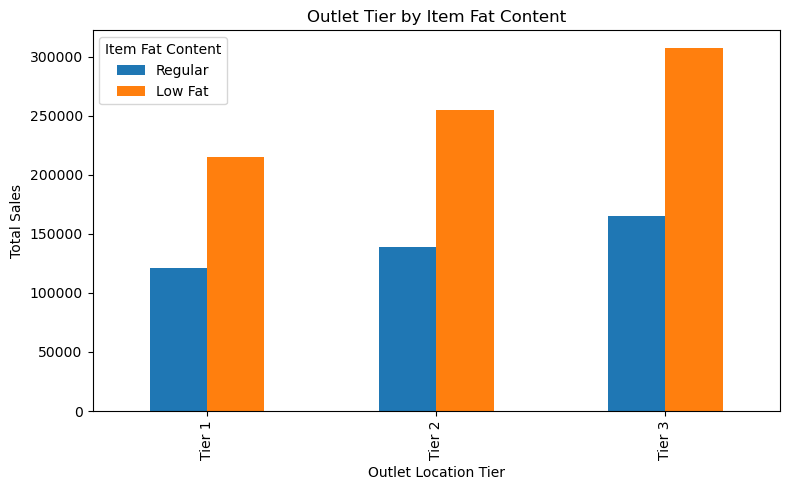

In [35]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content']) ['Sales'].sum().unstack()
grouped = grouped [['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar', figsize=(8, 5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

##### 
     # This bar chart compares total sales by outlet tier and item fat content.
     # Each outlet tier (1, 2, 3) shows sales for both 'Regular' and 'Low Fat' items.
     # In all tiers, 'Low Fat' items consistently have higher sales than 'Regular' items.
     # This helps understand consumer preferences across different outlet locations.

### 4. Total Sales By Outlet Establishment


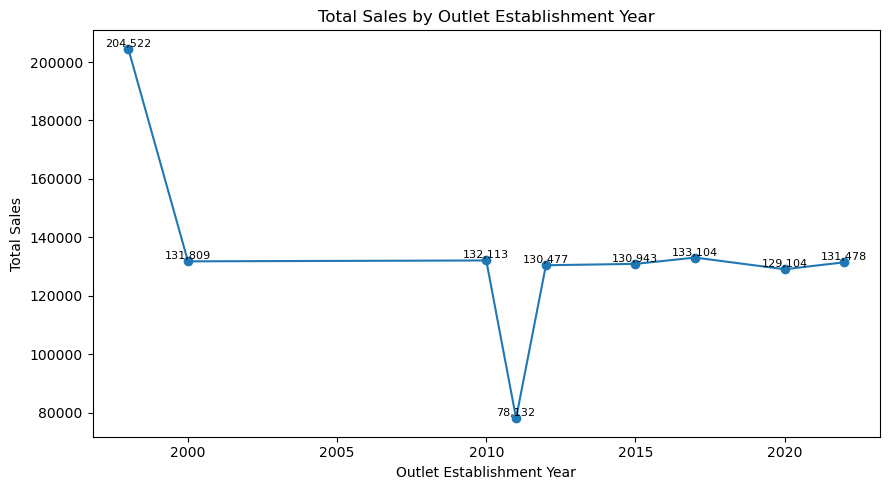

In [48]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment Year')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

##### 
    # This line chart displays total sales based on the outlet establishment year.
    # Outlets established in before 2000 had the highest sales, after 2010 saw the lowest.
    # Sales remained relatively stable across other years with minor fluctuations.
    # This chart helps analyze the performance of outlets based on their establishment timeline.

### 5. Sales By Outlet Size


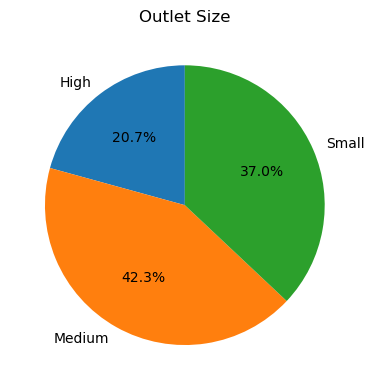

In [54]:
sales_by_size = df.groupby('Outlet Size') ['Sales'].sum()

plt.figure(figsize=(4, 4)) 
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

##### 
    # This pie chart illustrates the distribution of total sales across different outlet sizes.
    # Medium-sized outlets contribute the most with 42.3% of the total sales.
    # Small outlets account for 37.0%, while high-sized outlets contribute 20.7%.
    # This helps in understanding which outlet size drives the majority of sales.

### 6. Sales By Outlet Location


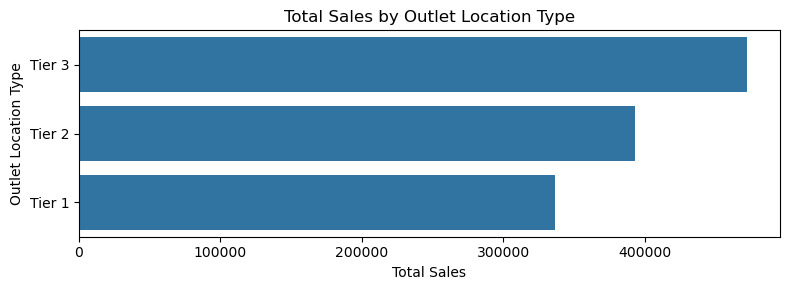

In [58]:
sales_by_location = df.groupby('Outlet Location Type') ['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8, 3)) 
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()

##### 
    # This bar chart represents total sales across different outlet location types.
    # Tier 3 outlets have the highest total sales, followed by Tier 2 and Tier 1.
    # The sales volume increases with the outlet tier level.
    # This helps in identifying which outlet locations contribute most to overall sales.